In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.text import *
import numpy as np

# train segal classification

in this notebook we will take the data that we create from amit_data.ipynb and create:
1. <b>language model</b> - to predict next word
2. <b>classification</b> - see if we can detect if a sentece is real or writen  by model.

## load the pre-train encoder &  create data

after we train an language model on out corpus, we can create our classification model and data.

In [4]:
path = "data/amit/"

In [14]:
# load the model:
learn_amit = load_learner(path, "learn_amit.pkl")

## create the data
#### true sentence

In [57]:
all_sentence = []
le = 0 # count the number of sentence we want.
# our learn.data split to 10 part, so we go over them.
for j in range(0,10):
    data_amit_new = [i.split(" ") for i in learn_amit.data.train_ds[j][0].text.split("\n")]
    long_data = [i for i in data_amit_new if len(i) > 20]
    for q in range(5):
        for sen in long_data:
            if le < 10000:
                s = ['xxunk']
                counter = 0
                while ('xxunk' in s or s[0] in [" ", ","]) and counter<5:
                    l = len(sen)
                    num = 6
                    first = np.random.randint(l-6)
                    num_word = np.random.randint(10, 16)
                    s = sen[first:first+num_word]
                    counter+=1
                if counter < 5:
                    new = " ".join(s)
                    if new not in all_sentence:
                        all_sentence.append(new)
                        le+=1

#### false sentence

In [133]:
create_sentence = []
le = 0
for j in range(0,7):
    data_amit_new = [i.split(" ") for i in learn_amit.data.train_ds[j][0].text.split("\n")]
    long_data = [i for i in data_amit_new if len(i) > 20]
    for q in range(3):
        for sen in long_data:
            if le < 10000:
                s = ['xxunk']
                counter = 0
                while ('xxunk' in s or s[0] in [" ", ","]) and counter<=5:
                    l = len(sen); num = 6
                    first = np.random.randint(l-6)
                    num_word = np.random.randint(6, 9)
                    s = sen[first:first+num_word]
                    counter+=1
            if counter < 5:
                predict = np.random.randint(10,16)
                new = " ".join(s)
                creator = NextWord(learn_amit, new)
                creator.generate(predict)
                print(le),
                create_sentence.append(creator.sentence)
                le+=1

היה התגובה של מירי רגב . עם נתניהו להסדר האלה לא
191
במפלגת גנץ עד השבוע , עלייתו בסקרים על רביעי , שמאל השתלט לא
192
כל עוד זה עובד . וכל זה וכל החקירות הוא מוקף
193
עוד לפני שדיברנו על אביחי מנדלבליט יותר ממה פיטר : הפוך : .
194
- ולא , או כאיש ללא כל ניסיון מנק משפטיי מספר הלילה נגד שמאל שמחה
195
אומר שהאתגר מספר אחת שאיתו מתמודד הרמטכ"ל לשעבר הכסף הבא אל תחמיצו .
196
הוא הוכרע עד להודעה חדשה . על הבמה השכל ג במשדר מפלגה שליברמן יתמוך
197
ישראל " זה דבר אחר לגמרי . סמכות החדש הלאו
198
ההתנתקות , כאילו שהם התבצרו בכלל על בניית סניף בנק
199
כך . לפני עשור בלבד נשא את רוביק מזוז על שכונות מוחלטת . ואמרו איימן
200
רשימה עם יוסי יונה ואלדד יניב . זה לשדרג את יולי אדלשטיין ,
201
שר הביטחון יעלון , שר החוץ ליברמן , איווט לא מוביל ובנט של גבאי .
202
אדלשטיין , ארדן , כץ וברקת במקום תגדיל את פצעי -
203
חסינות , או סתם לא לתמוך בממשלה . מה שמנדלבליט רואה כעסקת שוחד של
204
שנית , האם אורן חזן ישרוד מול ממשלת כהניסטי . הליכוד
205
שכמוהו מגיע לבחירות המי - יודע - כי - והוא להכריע משהו להעמיד
206

שנה , בשפל העמוק ביותר בתולדות המפלגה במטה בראש ליכוד הממשלה לכנסת . הדרישה
320
נתניהו ואפשר למרכז לקחת חלק בהרכבת הממשלה . הנציג מניפולציה על רצוי אורן
321
לכנסת . יש היגיון במהלך : הוועדה מסוג בין הרצוג ושמאל
322
השפעה מכריעה על הרכב הרשימה .  : האם אתה קשור כמתוכנן ניצח
323
החברים שכבר נכנסו מהחלון יקבעו בעוד שבועיים אחר כך . העילה מחוק
324
עם אותו נווה , כפי שכתבה גורמי בקואליציה , - מהדורה ציר חדשים
325
קולני דומה גם להצעת השוחד מסמרת שיער , ואיננו המשילות מידע
326
המהפכה ולא ביטולה . שיטות שוחד של ציקו אדרי .
327
בימים אלה , הם שומעים ויכוחים בין אולמרט , גבריאלי לאותו
328
בבלפור : נקודה שלמה . הדיונים ההסבר הוא נקלע אורך לטענותיו
329
) עובר רק קו אחד , והוא הקו הקריירה הפוליטית של
330
ההחלטה ערב הבחירות עלול להיות אסון מבחינתו . xxbos מאסר
331
לתפקיד , יש לזכור שמנדלבליט הוא במקור : : מי
332
הקריאה לעימות , אלא ארבע מילים קרים שלה ישלם על חשבון
333
לעשות להחלטת היועמ"ש את מה שעשה אתה . עובדה : היא
334
אחרת : אולפן בחירות , בפייסבוק , כדור ומגרש ירידה של מעמד
335
פי רוב ההערכות ,

. באולפן ח"כ שלי יחימוביץ ' נכונות 2000 , זה עצוב - שנתיים יורדת
447
של סילבן שלום . באולפן : ח"כ מיקי זוהר ( גנץ ) : : נמשיך
448
שלום . באולפן : ח"כ מיקי זוהר ( הליכוד ) במונחי נבחר
449
בסוגיית מתווה הגז . ברוח התקופה - ראש המוסד לשעבר
450
שריד פרש מהפוליטיקה עוד קראו לזה " . הוא פוליטיקאי שמח בנימין
451
ככל הידוע , שריד מעולם לא חלילה לדבר ? - בלב כפייה , רצוף
452
היה גדול שרי איכות הסביבה שקמו , מעריך יתד לשמוע עם
453
של חבריו . כמי שעזב בגלל ויכוח עקרוני ראוי איתו .
454
. מדי פעם הוא היה מתקשר , או ערב חסרי נודע . אתה פרקליטי נתניהו
455
הוגש כתב ההגנה בתביעתו של ח"כ אורן חזן במזרח התיכון . בריאיון בלעדי
456
חצי מבט , בדל סימפטיה . היחס , כמו שלי
457
היחידה להסביר איך גיבור ועידת הארץ הארץ , למשטרה חישוב
458
הראשון , קשה להאמין שריבלין הצביע אשתקד מחל . ייתכן שהוא הלך למסע האשמות אגרסיבי
459
ריבלין שלא בטובתו לתפקיד הלא רשמי של יו״ר האופוזיציה . שאולי יש לה זה
460
ממשל אובמה עדיין תולה תקוות במה שהוא רואה מהצעות הביטחון להשליך ובן ליבו
461
פוליטיקאי חלש שלא מצליח לנווט את פיו . עצבנ

– הסמן השמאלי בלשכת נתניהו . ובמקו המעניין אחד :
577
הרפז ? האם לשקד יש אפשרות חוקית לקיים את גנץ לביטחון לאומי , יתמנה דאז
578
את רעייתו של מארגן האירוע , ראש מועצת שומרון יוסי דגן היו ...
579
שישי לפנות בוקר לאחר הלילה הנורא יוסי שריד . מה קרה מה שקרה ימני כללי
580
למשפחת נתניהו לקח כמעט עשרים שנה , לאחר נוקב של רהמ הוא היחיד
581
" , כל רביעי ב-21:00 בערוץ הכנסת ... ) , מושמע עד
582
 אסף ועמית עם החג הלאומי החדש אחד בספטמבר ועם
583
אם הצמד הבעייתי - אלקטורלית הרצוג - לבני ? הרי
584
. בסקר שערך לאחרונה גורם עלום אמר לתוקף ברגעים כאלה : עי העסקה חריפים של
585
שהעבודה כבשה את השלטון בדור האחרון רק עם מושיק גלאמין שהיה קריטי בעקבות השני
586
לא בשדות הקרב של הממשלה והכנסת למרות שלא רואים לרגע שמדובר האמת .
587
ש"ח , ירידה של קרוב לארבעים אחוז , קביעת להתקזז
588
זה נחמד , אבל אי אפשר לשכנע נשיא המדינה הוא ימני עם המפתחות , כפי
589
או כל שילוב אחר . במקרה כזה מ- בכיכובו , אמר : : ... מדוע
590
ראש הממשלה , כמו כל גוף ממשלתי , אבל מיליוני דולרים מאומצת
591
. בישראל , כרגיל , יש נוהל מיושן רחו

לו על הראש ? ראש הממשלה , ייתכן שהוא עלול לקחת זמן אחרי
703
גם אם נתניהו ילך מחר ( שכן ) : שרון
704
בעולם המערבי שהיה בשלטון גם בשנות התשעים של הנוכחית נראה מה צריכים ללכת לבחירות משקפת
705
בטח מאכזב גם את הציבור .  מאז קו הדברי שעל למדינה
706
לעובדה שהתקשורת בישראל היא ברובה ליברלית , מתן אבקסיס הקואליציונית
707
לא נחכה להן עוד 4 שנים . רגע לפני 4
708
הערבי ב-2011 : שבירה ימינה . עד לא שלפיד רובם : שנתיים היא מקים
709
שהצביע ללבני מול ביבי קיבל את חזון שמאלני כולה שותפות ע
710
לפיד כבר לא מדבר על הכסף בין יצהר טובות : ארץחדשה של לדבריו העיקרי ,
711
לפרקים , החליטו לשבור למרכז . כנל לדוברו הנאמן אסי , לעתור גם ולנתניהו
712
לזכור בכל זאת שזה לא חייב , אלא מקווה שפורסמו המועד קינסטליך
713
אם נחשוב על איך ניתן לשלב ידיים ( ליד אופניים
714
משתנה . יו"ר מרצ מעריכה שגם הרצוג , פואד כי
715
הרצוג . יש במרצ מי שמציע להתאחד עם עיתונאי להתעמת עם סכין
716
המתקפות על לבני בקמפיין הליכוד האחרון , וזה אירוע יבחר מאוד בצוק איתן או שנראה
717
את מרצ משותפים לרבים בבית היהודי , וכן שקיבל יש
718
כיו"ר הקו

 למרות שבמקרה שלך קל לנחש . 9 % אתיות אך לא ניסיונות בבית משפט
833
גם אבא של ציפי לבני היה בליכוד , אמר עומק
834
מאוד אוהב . לא מעט פעמים , אבל לא בהכרח לה חדשות 2 ,
835
זה ברור . אני מעריך כלי תקשורת החשדות הפרשן משעממת . : 17 –
836
גדולות זה מוצר משלים " .  שכדאי לכם הגון שביו השבעת הכנסת
837
יש הרבה מאוד מתח . אני לא גאה חורשי שכולם
838
) . כבר בגיל 13 הופיע על ידי העובד פולקמן . נמנעי
839
לא נתפס כמו חיסול על רקע פלילי , חד פעמי התקציב
840
בסוף הרכבת ממשלה " , הוא אומר , היה כלום מהרופאי סביבה לא
841
מבקר הטלויזיה שלו , רוגל אלפר .  לחבריו 16 שנה בלבד , ועל כן
842
אפשרות שהרצוג יצליח להרכיב ממשלה או בהמשך לממשלה . הלוז הזה מדויק ובגלל
843
בבחירות האלה . יושב לו מבקר טלויזיה מאוכזב בליל המדגמים . שניחתו
844
  במסווה של ביקורת טלויזיה הוא כתב לתקן , במתח
845
סיפור בחירות 2015 : לעזאזל העובדות , המשמעות היא שטראומת חלפה בצדק לא השתכנע וזו
846
. הנזק האדיר שנגרם לתקשורת הישראלית הישראלית . אותו ראיון עטר לשבס
847
" רק לא ביבי " – הפך אותו להניח יישא ראש הממשלה
848
של הליכוד אפשר להגיד 

תשב עם מושחתים בממשלה . ובלי חדש שבישראל בהפעלת חוקרי . כשהרצוג
965
לפיד ציטט את האמירה : " מושחתים נוספים , לא תיקון לחוק סער . ביקשה
966
עשרות גברים אשכנזים חילוניים בגיל העמידה שחגגה . מאז סרוגות שבה לא מנהיג ,
967
. אין שם אף גנרל . ליברמן היה מאמין בכך , ואחר כך
968
 שתי המפלגות הגדולות החליטו להתנהג . זה לא רע יו , אבל לפחות תשעה
969
הליכוד או בממשלת אחדות . שלא תחשבו לרגע זה האחרון , וזה
970
נראה כאן מירוץ ראש בראש במספרים גבוהים במטה . חצי ירושלים ייבחר לתקן
971
: שמאל ) על הניסיון לזכות בבחירות הארץ . עכשיו במקרה הטוב
972
מכיסאו . " רק לא ביבי " , יישם זאת פלוס ע שתמלא
973
הוא הכריז על שינוי שיטת הממשל כנושא בה , הקבינט בקרוב משמאל
974
נראה שנתניהו עושה מאמצים כבדים להפסיד את הבחירות . הוא לא אוהב את הטלפון ביד
975
שעה , עשרים דקות . בסיום אנשי בוחריו 92 מחודשת
976
מאבדת גובה , אבל הליכוד לא אוסף המנוחה להם . והתוצאה עובדת שבעטיה שטוען שליפקין
977
שיהיה קשה מאוד עד בלתי אפשרי להרכיב ממשלה . לכן והפרת אמונים לפוטין
978
 אם לסכם , שתי עובדות יסוד בדרך , הרצוג
979
שבגללה יאיר לפי

' ולא ' כמות גדולה של היועצים האסטרטגיים האסטרטגיים של ישראל
1093
בצדק . היה שלום , יוסי שריד . נובעת הווטסאפ
1094
 היום בצהריים הוגש כתב ההגנה בתביעתו של הדוח כמפלגה מיוחד .
1095
המשפטיות שבשלהן יש לדחות את תביעת חזן ודמוקרטית . מאז הטבח לצהל לקראת מידע .
1096
הזמן ממש , הגדירה אותו ציפי לבני . ידידו ההיסטורית של אסף
1097
השמאל שחש בעל הבית תבע נאמנות מוחלטת גבולות 67 . נראה שיש פתרונות כרגע ,
1098
סימפטיה . זו הדרך היחידה להסביר את זה הבחירה רוצה ארגון לממשלת ישראל . גנץ
1099
ישנו כמובן גם המרכיב האישי , לעומת זאת למרבה למלחמה .
1100
ללהק את ריבלין שלא בטובתו לתפקיד במשטרה : החדש היא נוחה מנתניהו , אם יקבל
1101
  אולי איש לא הרים את עיניו ? תתקן את המהלך ועדות לזרועות
1102
הטלפון של פוליטיקאי ידוע כדי ללחוץ עליו מיד גבוהה ; מרצ נראית בו
1103
הסיבה הראשונה היא שכל מנהיגי הימין לשמאל - לבני ,
1104
 הסיבה לכך היא עמוקה יותר בכירה שהיא יותר מכיסאו . קשה
1105
אם הציונות הדתית היא הקורבן , או להפך ושהמשך חרפה על כל כך
1106
מיליונים בודדים הוא שלט במיליארדים רבים . דרש בפרקליטות העלייה ארכה

הזה : הניסיון לכפות את רשות השידור המנוע העיקרי של כחלון רק אפקטיבי של התמודדות
1219
את ההתערבות של נתניהו . טעות במהלך לדרישה לא השקוף של
1220
אפשר לשמר את רוח השידור הציבורי , זו בור שהחוק
1221
. אפשר לחלוק על הדרך . אסור לשכוח שזו המטרה
1222
זאת : למרות המקום השני בפריימריז שלוש פעמים . יגידו השיא :
1223
כעת היועץ המשפטי לממשלה , יריבו המרכזי של אוסלו הייתה
1224
שאמר על המשטרה . מבחוץ , לא יוכל טובות נזק
1225
דמיון מסוים בין בחירת המפכ"ל והבחירות לכנסת . ומהצד הקודם :
1226
של נוני מוזס על תכניתו של שר האוצר איילת שקד
1227
אחרות , זה הזכיר כותרת אחרת , המשמעות - אנחנו לא ידעה מה -
1228
השאלה : האם גם התקציב בדרך , הליבה כאילו : זו לא שמע להסכים
1229
הוא אמר פתאום לתקשורת שאין סיכוי שמחירי הדיור , ארבעה חודשים ספורים על מעצרו
1230
ייתן לך לעבוד , אבל אנו עובדים ביחד לליכוד ? חברה זה לא רע
1231
שלו . בנט הורג אותן ברכות . ( עזר ) ניצחו . אורי
1232
לפיד היה הגב הפוליטי של פירון מול נתניהו רוב התחייבות שלו ,
1233
שינוי , מותר יאיר לפיד על יין אדום , ואלה – ואפילו השוואה התאהב
1234
רואים 

של נתניהו במרכז הליכוד על דוד אמסלם , אך שאול לא במתח ואת הגרעין שאני
1344
טרום - הבכורה של ממשלת נתניהו , עם סיוע מחוק הלאו
1345
יזכה להחזיק בהם תוך שנה - שנתיים לחולל מהפך בקולות 60
1346
בארבע שנים יכול להרשות לעצמו צעדים לא יירד בלעדיהם , מוקד לסיקור בבוקר כראש
1347
. הוא כבר סגר עם שתי מפלגות אופוזיציה הממשלה . הבהיר : החמאס בין שתי
1348
ככל שהם חוזרים יותר על התחייבות , מה מסביר הנגבי הרי שר הביטחון
1349
. הוא לא יצטרף לעולם לממשלה לממשלה . לא סובלים את תשובה .
1350
הציוני נראות כרגע לא ריאליות . לראות איך מעונין בגלל היד . שגריר ישראל
1351
אירע בדור האחרון רק במקרה של הירי מבצעי כישלון לכהן , ינון אזולאי ייבהל
1352
שבעה שרים בליכוד ייאלצו לפנות את מקומם בממשלתו . בליכוד הוא מטפס בליכוד
1353
חופש הצבעה בנושאי דת ומדינה , מתישהו הימין נגד פרישה אפשרית : הוא שמביא אותנו
1354
השולחן הצעה : תיק החוץ ליאיר לפיד , וכעת מצליח צבע דומה ,
1355
משה כחלון , ממשיך להבהיר לו בשיחות סגורות . הוא ממשיך
1356
בהעברת תקציב בסתיו הקרוב זה עלול להיות ההפך . אבלי ההתפטרות של ליברמן .
1357
של שר האוצר 

החם הזה וצריך להגיד מה יצא ממנו . המלח : האלה לשביעי על ראשות
1467
הממשלה יכולה להיות סיוט ארוך ואני לא פוסל על טיב הסכ אוסלו . לא
1468
על רקע פלילי בבאר שבע או באשדוד , אחרי חמש דקות
1469
שבועיים יאיר לפיד אמר לי : בבלפור שעוד היה ספק , זה
1470
אפשרות שהרצוג יצליח להרכיב ממשלה או שכחלון , באזזז מטורף על ההתפתחויות להבין , אבל
1471
. יושב לו מבקר טלויזיה מאוכזב בליל המדגמים . מחוק הלאו כמו
1472
שעד אמצע הלילה עוד בנו להרצוג דיל נגדו עם בהתאמה
1473
 אני לא כותב את זה כי שתגמור את הדבר הנכון יש כמה
1474
. כך הפך הפיגור העצום לניצחון של " , עומדת הודיע
1475
הייתה הצלחה אישית מרשימה . הוא הביא איתו יעלון האחוז בערב הגנה
1476
  3 . מי שכן צריכה להיות בהר הבית .
1477
נתניהו , הביא אותם לעשרים פלוס פלוס ערימת 11 שמונה
1478
יחד עם חיזוק של לבני להרצוג אסטרטגית למקו מסלקת על שבדק את המהלך ובנה
1479
המציאות בחדרים הסגורים של מטה המחנה הציוני . נעל את כחלון במערכת
1480
של הישראלים : " רק פראייר מצביע נתניהו ; ליכוד ביתנו 60 מנדטים נטו
1481
החליטו לבוא להצביע , ולא לספר על אדום . אלמלא
1482
הרוב ,

  לנתניהו יש כמעט את כל הסיבות להיות פער משמעותי . בלעדיהם המשמעת של
1590
ראש הממשלה : הראשונה היא מירי רגב , אחרי ראיון בלעדי למהדורה המרכזית מצהיר
1591
חשוב במערכת הבחירות הזו הרבה יותר מדי . מוזמני : :
1592
 1 . המתקפה החזיתית על ליברמן , בנט ושקד – להפנות את תשדירי
1593
בין קבלת השוחד של דרעי ופרשת השחיתות האחרונה האחרונה בצמרת ישראל . מה שרואי
1594
. לפיד ציטט את האמירה : " ליברמן , גם אם
1595
אשכנזים חילוניים בגיל העמידה , לרוב בך כזה גדולות נשמע
1596
את השותפים שלהם למחנה : נתניהו ימסור הערב בשעה : הא יש
1597
. שלא לדבר על ישיבה עם ההסכם אצלו . רצון משותף דיפלומטי ממלאים חוץ
1598
נראה כאן מירוץ ראש בראש במספרים גבוהים מוזר . צריכה להיות יכולה
1599
דרך הקלפי . הדתיים עזבו בשנות השבעים , של שחשבו תצביע עם סער
1600
עושה רושם שהרצוג ולבני בדרך למהלך דומה : של נתניהו עצמו
1601
כחלון . הברית בין הרצוג ללבני ומעריך את אשתו של הליכוד
1602
למשבר הדיור . בנט משחרר סרטונים האיראני שוב . המוזר לבד קידם נכונות . במחאה
1603
וחלקם עם ניסיון כושל . בקיצור : גם לא . הוא בחר
1604
מעל הדוכן , " אב

עולה , הפער מהרצוג בהתאמה לראשות הממשלה מתרחב , מתחיל יותר
1716
עד שאפשר להיות די בטוח שהוא אינו יועץ פוליטי , וטוען שלא
1717
הרחוב . קודם בנט , אחר כך ליברמן מה לצמצם אותה 17 מנדטים הוא
1718
 האם כחלון הבא בתור ? מה כבר לא יקרי
1719
לפיד זכה לקצת יותר מ-40 מנדטים , בעוד פחות לפעול
1720
דרעי , שיכול היה לכפות על נתניהו המשא ומתן ומתן הרצוג
1721
אם להאמין ליו"ר ש"ס , מי שבשנה האחרונה אד ,
1722
ח"כ שלי יחימוביץ ' ( המחנה הלאומי ) . הנאום הנוכחי המדיני בי (
1723
. באולפן : ח"כ מיקי זוהר ( בני ברק ) , מיקי
1724
של סילבן שלום . באולפן : ח"כ מיקי זוהר ( הליכוד
1725
מתווה הגז . ברוח התקופה - ראש המוסד יוסי דגן הטרי סירבו כאן בתפקידו
1726
בשבת בבוקר , וכך התבטאות שהייתה יודע המינויים 5 - 6 יודעת
1727
הם אולי לא יודעים , אבל את אחת האפשרויות . לקלפי בערב ומנדלבליט בישיבה
1728
גדול שרי איכות הסביבה שקמו כאן : החליט הסתמכות על
1729
. גם ממנה הקריירה הפוליטית שלו הפסידה , אולי זה כאילו הקבוע
1730
 6 . מדי פעם הוא היה לשחרר אנשי בהקמת המפחש של מסורתית
1731
כותרות . מאז אתמול ועד עכשיו הוא סיפור ואר

הסכינים בעיר העתיקה ? אולי על הנעשה בבית נפתלי בנט , הלכה היו
1847
ובאשר לחוסן : ניצחון על הטרור כולל בעיקר המרכזי . יחד
1848
איבד את הביטחון – גם את המשרד וגם את המשרד וגם את שחרור
1849
תיק הביטחון אחרי הבחירות , מוצא את עצמו תשובה כתב אישום :
1850
של ממשלת נתניהו השלישית . זו לא ממש מסר כמו סמך לשקר . אלשיך ייאלץ
1851
של אז עמד על עשרים מנדטים לתת ישן על ביטחוניי . שהשקפותיו או שמאל
1852
כמובן . זה רק אומר שבפוליטיקה לא תמיד ומרצ . למה אמרו דברים :
1853
אביחי מנדלבליט ליועץ המשפטי לממשלה . נוהל הטינה שלהם מירי רגב במרץ . חכ תמר
1854
אין מינוי אסטרטגי מזה במערכת המשפטית . בגלל האמת מכריעות :
1855
רון שפירא , שפרש בינתיים , הוא דווקא פותח מספר
1856
. אבל מה יקרה אם ייפסל בשל תפקידו הנוכחי ומטיב בן
1857
ראש הממשלה . בין שר לשר בכיר בתקופות המושב , וגלעד ארדן תקשורתית
1858
לי חשוב להגיד כמה מילים בקצרה " . השר אמרו שלי
1859
פוליטיקאי צעיר למדי , בקושי חודשיים בתפקידו כראש ממשלה . התנגדות עזה דרמטית
1860
את צמרת הליכוד בזכות כמה אלפי מתפקדים , אבל לא בזכות טלפון הדין בפייסבוק ,
1861
" , כ

לזה יותר מאי פעם בשנה האחרונה . הרצוג יכולים לגנוב סוסים ,
1974
ממשלת אחדות . הם , משום מה המדיני ושבר את פרס , בהנחה
1975
עד 2011 היה כמעט בלתי אפשרי להביע נגד היו"ר .
1976
( רשימה חלקית : אהוד אולמרט , ציפי לבני לא בתמיכת גוש - ימין .
1977
ששר אוצר לא יכול לקבל החלטות על הגדלת אמירתו לבחירות הער החליף את
1978
שלך " ? והיא השיבה : " המסקרנת הוא דורש הציוני לא יקרה שחזור
1979
שרי הממשלה עלתה עד עכשיו ישירות בחייהם הפוליטית של העבודה ,
1980
להציל את הימין צריך ללכת לו על הראש , במו"מ הקואליציוני לפני
1981
השנואים כל כך על נתניהו : היא מיושנת , רבים להרשות לעצמו
1982
גם נתן אשל חוזר . לא ברור למה יש לגבי שני יכולים מפצלת
1983
בתקשורת . למעשה , הוא אולי הפוליטיקאי האהוב ביותר . xxbos ראינו דחה
1984
שאפיין למשל את אולמרט ושרון . זה נראטיב כה מטריד פחות , לפני האוצר
1985
כדאי לזכור את זה לבחירות הבאות . ממילא היה ברור מי ששמע לעשות
1986
שלום " , הסכים למדינה פלסטינית , ולפרטי החלטה מדינות ותשודר .
1987
המליץ על נתניהו ולבני ישבה איתו בממשלה חובה בחירות מה לא להפסיד ואת ביקורי גנץ
1988
הרצוג

 בוא נחזור רגע לעימות . לא לפני חודשיים לדימוי מיד עם ליברמן : לא
2101
להפריד בין עימות שלהם לעימות של אחרים . אחד מהם צלצל בעצמו : השבוע
2102
את העימות עצמו הגישה יונית לוי ואתה היית פרשנות מאז זאת ,
2103
אם מדברים על תסכול , זה לא שם אחרי סמך פשוט :
2104
לא בטוח שאני מגיש טוב . להיות מגיש בדיוק ההפך חוויה שיש :
2105
משהו שני לא בטוח שאני טוב למגרש : זה בסדר ואקום כזו . מעניין על
2106
אלא משלים , שנמצא באוויר כבר הרבה פחות לך .
2107
מרשים , אין ספק . תגיד המשפט הכנסת הוא אפילו שישראל
2108
פוליטי לא צריך להגיד למי הוא מצביע , כה ברור משהו שמאלה ,
2109
לנחש . אבא שלך , חגי סגל נכנסו נתניהו , באמצעות ממלכתי
2110
ציפי לבני היה בליכוד . אני יכול לנחש באיזה צד את
2111
כלי תקשורת שהפכו לכלי תעמולה בשני הצדדים לתפקיד נתניהו : כמו אחר - ניגוס מיותר
2112
רווחת ההנחה שצריך לעשות הנחות סלב לפוליטיקאי מסויים . גרשון
2113
וצריך להגיד מה יצא ממנו " . מולו היה בשבת הגדולה , אלא
2114
והכנסת לא תחזיק מעמד הרבה זמן " . נישא אל
2115
מכן שזה לא רלוונטי " . אביו מסוג רבתי הענק
2116
אני מאוד שמח שזה מגיע בס

וחצי . רוב התמיכה מגיעה כנראה כותרות . אז הצעת נתניהו בהפעלת כוח התחקיר
2227
על דרעי וישי גם יחד . הבית היהודי זינקה את העבודה . רק
2228
אלה שרואים בו מחזיק תיק הציניות בפוליטיקה הישראלית . בידיעות נועדו הרוסית שהניח לפתחו של
2229
? עדיף לדרעי לפי ההיגיון הזה ללכת הביתה ולסכן את שלטון הימין ? אז
2230
ללא יוצא מן הכלל , נתניהו ילך : באשמורת השלישית . העובד
2231
את הליכוד כבר למעלה מעשור משתי קבוצות שביצעו עליו השתלטות עוינת
2232
יושב ראש כנסת . גם זו לא האמין בה הודיע
2233
. " הוא איש מלא הפתעות . מהמר במזרח התיכון
2234
לרוץ איתו ; אדלשטיין במקום גבוה . בראיון העגום בקוד בסקר
2235
של ראש הממשלה : הראשונה היא מירי רגב . למחרת בכלי הברית הקשה
2236
מכפי שהוא נראה במבט ראשון .  הבחירות האחרונות : לא
2237
החזיתית על ליברמן , בנט , נתניהו אומר כאלה יראו שצדקנו . נתניהו
2238
תשב עם מושחתים בממשלה . ובלי קשר : חבל שבטרור לא שבדק מאז
2239
3 . לפיד ציטט את האמירה : " שהשמועות על החלטה מתרחב ... ויותר
2240
חילוניים בגיל העמידה , לרוב עם דרגות במיל או שהחרדי ציבורי שיכול להיות שנשמע במחשב
2241
שלהם

הוא זה של אהוד ברק ב-1999 , וזה אינו יועץ פוליטי , הוא
2353
יוכל להגיע לראשות הממשלה רק באמצעות רוטציה . רק חדשה בכנסת הבין העין מהמשטרה
2354
גדול תומכיו של נתניהו במפלגות החרדיות .  בקרב הבוחרים בקרב הבוחרים מאשר בקרב ראשי
2355
" . דרעי התכוון להחלטת ש"ס להיכנס לממשלה . - ליברמן
2356
יותר מזה עוינים את ציפי לבני , אבל היעדר הצורך במחיאות כפיים
2357
על החלום להשתתף במכרז של המדינה בודאות בראשות העיר , מחדש עובד לטענות זוטר ,
2358
ולפיד לא רלבנטיים ; בסופו של השבוע כמה מקו חופש הוא שמרן
2359
לא מצטמצם . מכאן זה רק בממשלת גנץ , תיק הביטחון
2360
רגע השיא של הנאום בקונגרס , תשע שנים אינו פוחד לקדם , ראש
2361
הבא . בראשון ידברו על הסכמתו סיקור אותו שאחרי מיליון .
2362
קודם בנט , אחר כך ליברמן , שאלתי את ביקורו בכלא , או מייסד את
2363
מנוגדת כל כך לאינטרס האלקטורלי שלו , ממש של מפלגת העבודה
2364
המתנה שהעניק דרעי לנתניהו חשובה משתי סיבות : נתניהו מעוניין ממנו לפתור שזה
2365
– הרכבת הממשלה הייתה הולכת כנראה , לקח והשאיר את המהלך
2366
להמליץ על נתניהו , גם אם לא מצב חכמים מצטרף . הוא
2367
ובסו

. אך אני מבקש שלא לצלצל לשם ולנתק , כי זכותנו להתיישב בכל
2476
ההודעה של ליברמן משמעותית : הוא מדגיש שאיננו רוצה שהוא מבזבז את
2477
לו את הפעולה על כל פרטיה כולל שעת החזרה הגבולית , הרבה שני
2478
החרדים , ולפי ההערכות גם עם שותפים נוספים . קיצורי בחמת
2479
הממשלה נתניהו ייפגש מחר בצהריים עם כל ראשי סיעות הקואליציה . אבל מה שיעלון
2480
איתן הוא ייפגש הערב ומחר .  יאבד לצפות חברתית , או הוזכר
2481
יור אופוזיציה שלמד מהלקח ובניגוד לכל העצות פעל לדחיית בחירות שבהן פיגר . התקווה במטה
2482
ברק : מרן שר התורה הגרח קנייבסקי העניק איווט יקבל פיזור של שרי וחברי כנסת
2483
המשבר די חיזלשו אותו אתמול . כחלון עשוי להיות בטענה לספר של התכנית
2484
אמרתי שלא ארוץ לראשות הממשלה מול נתניהו , אבל נתניהו רוצה מעוניין לחזור ז"ל
2485
ביחד . אנחנו עובדים כדי לנסות להשיג את גשר של אורלי לוי ,
2486
  בשובר שורות באיזשהו שלב 1996 – הלא לעצמה כמו מהשרי הקדמה
2487
האיש החליט להרוג אותי כבר לפני רבע שעה הגמר . באריזה
2488
: תליה על עץ לאחר טיפוס על סול שיוצב במגרש ועליו
2489
מתקרבות באשמת נתניהו הן מתקרבות בגללו . 

החוק נגד הפרקליטות , ולרגל הבגרות במתמטיקה באירוע הפרלמנטרי גלנט ולרגל מאלימות משטרתית דודי
2602
. נגד נתניהו יש שלושה תיקים ולא לתקן . וגבי בהסכמה :
2603
להתפטר . לפי הלכת דרעי ופנחסי - התגבשות כתב האישו . חשובים בראש הקואליציה
2604
פעם הוא דיבר עליה , שווה עליה 2015 : 2006 .
2605
על פרשת נחמן שי : הזכירו לי עכשיו מוזרה קרים . נתניהו כבר גם ראש
2606
אחד בירושלים , לא מטריד אותי במי יתמוך נתניהו - אולי
2607
למרות שליצמן הציג זאת כתנאי לתמיכה במועמד לראשות הממשלה , נרגשי
2608
ביותר שהופנתה אי פעם מצד גורם בסוריה . הנה הימין החדש הוא השקר
2609
בעקבות דיונים בועחוב באותה תקופה , נוספו קורסי בפילוסופיה לחומר הלימוד בחלק
2610
פרישה ארוכה , דוד ביטן אחרי שתיקה מהפרשה של נעצר
2611
את פרשת השבוע שלח לך וגם את פרשת רגב . יואב
2612
של רהמ נתניהו מגיע בפרשת שלח דמיון ב . היחידים פחות הרוגים הוא חציית
2613
על הירידה בסקרים , הקריאה לחקירת משטרה על דפי הפייסבוק הממומני נגדו
2614
המלצות ועדת חוק הגיוס . אצל החרדי בהקדם על מנת נסיגה ועל כן ,
2615
לקרדה או הרינג אחד בקיץ הזה ולקבל שקט תעשייתי עד כדי ל

 הרקע הוא קרב אדיר בין אלקין וברקוביץ של ישי לבחירות . לא כל הכנסת
2724
על ראשות קדימה , תפקיד שאותו פינה רהמ דובר המפכ"ל היה קרוב כחלון אותו שעובר
2725
היה יום כיפור למועמד החרדי יוסי דייטש , עדיין מודע נראה כמה סיכוי
2726
חריפה על המועמד זאב אלקין . נחמיה שטרסלר חדשים נגד להתנצלות ,
2727
הכנת הרכבת לירושלים לקחה כל כך הרבה פוליטיקאים השנוא טורי 2005 , מסער ולוין
2728
הנאמן על המינויים הפוליטיים של דני דנון במיליוני שקלי . ? הכוח
2729
בנוסף לשס , לפלג ולרשימה שנתמכת בידי אלי ישי . במקו לשרת
2730
יפרוש - אלקין בטוח בסיבוב השני ובסבירות גבוהה השבוע בשיחה לה באופוזיציה משנית : כל
2731
ישראל כץ בראיון מהפכני - על אופניי שדות . לחצי מכל
2732
שלא היה כלום ולכן גם לא יהיה כלום כאן . וכמובן ; אבל
2733
הערים ילחצו לחכות עם ההחלטה עד אחרי הבחירות הקרובות ,
2734
בצבא . כמו שכתבתי , סביר שהתהליך יהיה איטי יותר יותר . אפילו
2735
הקואליציה . ליצמן וליברמן אפילו לא הגיעו . קואליציה לא מוכן להתחייב לחפש אלא
2736
מאחור גבאי מאבד עוד שלושה מנדטים ומאבד דבר הנאה מאוד . והתוצאה
2737
את ההחלטה . כאן מדובר

את חוק הנאמנות בתרבות של רגב ואת חוק הלאו . דאגה שאנו
2847
אחותו של יאיר לפיד . טו בחשון תשכא - ... . אייכלר :
2848
הצבאי של ראש הממשלה נוכח בכל הישיבות . לפני חודש
2849
הודעת ראש הממשלה . מעניין : נתניהו שבמסגרתה לב שייכנע בפגישה
2850
. גם חיליק בר יזומן לבירור כשישוב מהגולה הדוייה מאפשר דניאל אם
2851
וביקש ממנו להתפלג בהסכמה ממפלגת העבודה . שהגיש את הרשימה
2852
בראשותה , ינון מגל על תחקיר המקור על ההסדר , איש
2853
בפני שמולי על כך . אחר כך קיבלתי מסרוני מפעילי של העבודה התיקי הטבות המס
2854
באה הדרישה לפוליגרף . הוא צלח את שניהם חם לברק . ייתכן במבחן
2855
רק מייעצת , ולכן להביא לממשלה אחר שעוד פיגר .
2856
לצד ארדן ויצביע בעד אישור אדרי , בניגוד לרוב הודות
2857
 המפכל הזמני מוטי כהן הוא אח של דודי כהן 300
2858
בזק בכלל , ובעל השליטה בה - שנתיים . חוץ לחמוק עזה
2859
לגביי ולגבי רעייתי לא מפתיעות איש , אמר נתניהו בטח רוצה להשלים את עצמם
2860
  בגצ נתן ארכה : לחוקק את חוק הגיוס עד ... א
2861
אלוביץ ומבקש להשמיד טלפונים , מגיע מנכל וואלה הגיע אליי כנראה לאחר
2862
של המפכל . איזו מתנה קיבל

: נשלחתי לרב דרוקמן על ידי מקורבים את ההודעה ביטוח אתמודד בפריימריז .
2975
שוקלת אותה ברצינות . הגישה מהדורות במשך עשרי שנה בגלצ , ולפני הפרעה
2976
בחירות בחדרה : שאלו אותי למה מינית את גלנט לשר השיכון
2977
יש גן מזרחי , שקד חצי עיראקית . הגמר שמאפיין את השיח
2978
של שופטת שלום אחת לפני מספר שנים ולניסיון להביא תהליך עבודה התקשורת
2979
ומקצועי . לצד השרה מכהנים בוועדה שני הוא לא זכר . המשימה של ההצהרות
2980
  ברשות השופטת בישראל מכהנים שופטות , יוסף אחוז ישראל השידור . 9
2981
עוזב את המפלגה , או את נווה - יביא או בחירות בניסיון לשנות את
2982
אחוז החסימה , והיא לא לבד ע נתניהו . שלושה לשרה שהיה שר האוצר .
2983
: הליכוד 32 יש עתיד 14 חוסן לישראל 9 לראשות
2984
נתניהו צריך לדאוג : אם הבית היהודי יקבל מנדטים הפעם הם היו למי להרצוג
2985
ורבע מכולנו , מעריך ומקווה שמפלגתו לשעבר לא תעבור את אחוז החסימה . אבל
2986
ימים נסגרות הרשימות לכנסת . לפי כמה שהלך רפי פרץ , ביטול
2987
  ארדן בסדרת סרטונים דווקא בעד להשמיע רק את הפוליטיקאים .
2988
מצביעים ופער מצחיק עוד יותר יספיקו – לנתח כל שממילא כל שעו

אנגלית במסיבות קוקטייל מפוארות . כשפיקדתי על שלדג אתה אנשי עשור .
3098
. נראה כמו התמקדות במצביעי הגוש  . זה בלפיד קלסרי
3099
מעבר לשאר יתרונותיו , טל רוסו טובה להיות לפוליטיקאי של כץ . האדמו"ר !
3100
למחוק את התשובה , כי בדיוק סיפרו לי מושג באיזה הקשר , יצליח
3101
סופי : הימין החדש השלימו הגשת הרשימה לכנסת . ארדן פנה
3102
 האירוע המסתורי הוא שחוסן לישראל לא מחוץ לכנסת – מנת
3103
פרסום ראשון : במטרה להבטיח איחוד נכנסה לא מכבר , יערי דרעי לשס כבר
3104
. ראש הממשלה נתניהו : הבחירות הבאות הן הצביעו שטוען בלפור , חיפשו
3105
החליטו בני גנץ , יאיר לפיד ובוגי על חשבון מא על אחריות מעמדה של הרשות
3106
קטן לאנשי גנץ - יעלון . משהו כמו שנהגנו : לא
3107
לפיד - גנץ בתמיכת גוש חוסם של לפיד הביטחוני קיצן
3108
וגם ראיון בלעדי עם יור ועדת הבחירות המרכזית , בלעדיו היה לו נגד
3109
מיל אבי בניהו , חברו של מעניין שזה ייגמר עולה . עד שעמד
3110
  יור ועדת הבחירות המרכזית – כל נאבק והודיע על אמצעי של צה"ל והציבור
3111
שיהיה לה ראש ממשלה בדמותו של יאיר לפיד להצהיר על דעתי , ואני עובד
3112
לפיד רהמ גנץ ביטחון 

משהו לא צריך אפילו עד מדינה אחד בממשלה . על הפרק :
3225
. הוא הזדעזע לדבריו ממעורבות של משפחת נתניהו בהחלטות בטחוניות
3226
לכולנו בימים כאלה להכריז שזהו , זה גמור ומחוסל ות הטקס
3227
קצב שלא הגיע כדי לחתום על עתידו שלו תקשורת יעמוד ראש עיר
3228
יפריע . קשה , קשה .  לא היה שר העלייה , איש העסקים כנראה
3229
חריף אבל אולי דווקא פותח פתח את המפלגה לאחר הבחירות
3230
: סיקור חיובי לשנה לפוליטיקאי שיביא הצעה שתגמור את המשבר התגובה על פני , ואחר
3231
יפרוש מהממשלה , שכן ראש הממשלה כבר הבהיר . דבריו של האופוזיציה
3232
האם ייתכן שהוא מכוון בכלל לא לחוק הגיוס רק הצביעו ויש עתיד מנסה כסף שלהם
3233
פנים , השותפות יירדו מהעץ רק לאחר שהוא יירד מהגדר . אבל בלי תפילין התיקים
3234
זו לא שאלה תיאורטית , יש לי נסיעה שלי וזו הוזמנו
3235
ההנחיות הקוליות של נפתלי בנט , וכעת פעם ימין ושמאל . לא רק שזה
3236
בקואליציה : נתניהו ירד מהגדר- פועל למנוע בחירות . בהכרעה
3237
מגילה , בני המן והעץ . הימין בפני הליכודניקים התורה הוא עקב
3238
את החוק הכי טוב למען צה"ל מעטים , או או
3239
לא שהיה באמת ריאלי גם כך , דורש שצ

וחמאה בשבילו , אני מסיק עד היום . ההבדל בין איומים
3346
חיות . בכירים בליכוד : היו 4 - 7 אחוז
3347
לא שוקללו בתחזית ישיבות שבעה לא מתוכננות ממשלה במערכת בחירות . בהליך
3348
רהמ אמר לראשי הקואליציה : כדי להיות שוחח ע ליברמן , אבל
3349
לשמוע דעה שונה- מתוך חדשות הלילה עם דוריה למפל אתמול . כי בלבד
3350
אני יודע בדיוק איך איש ימין ממלכתי אמור להתנהל ולא בספיני
3351
  עכשיו כשטראמפ מצטט את דברי שבועות . אזלו
3352
משירותי הצבאי . כמה לילות עברו עליי במארבי במחוז חסיאא , לתושבי תא
3353
 וברצינות , צהל הגיע לרמה שהוא קטנים רפובליקני לא פחות רלוונטי
3354
החדשתומר רזניק 27 נבחר הערב ברוב שעבר , הופיע בישראל
3355
ועל ישראל . יש לנו מטרה אחת מוטלת שעזב את תפקידו
3356
חמישה שבועות יכולנו להיות בקלפיות . והאם שאיננו כמובן השאלה רק
3357
. השיג שם שלושה מנדטים . 2 . שינוי ובין מדגמים עלול לרוץ
3358
שנה : נתניהו 24 לפיד 23 בכירים , יהודי - אלוף קוני עוד
3359
התקיפה האיראנית לעבר ישראל הלילה היא הוכחה נוספת לעבור את
3360
  אגיד זאת כך : לפיד האשים את הפני טריוויה
3361
שם ההערכות הצהלית הכוללת בשבועות ה

 קחו , שיהיה לכם . בפעם הקודמת בדיוק ברור
3471
בקשה טכנית להשלמת פרטים . ובקיצור : ישראל ביתנו בצירוף שר הביטחון הקודם את
3472
כל התיקים לאחד , זה אומר שהכרעה בתיקי נתניהו נשמע מוזר נזכר הח"כ
3473
אריה דרעי , כי הפעולות שבוצעו אמש בהפגנה להתפטר , יואב גלנט בראיון ראשון
3474
 לפני שבת , ברכות חמות לרוזה פה שדעת של כמה הבא . בתשובה
3475
חיסל המוסד בפאריז את אחרון מחבלי אשף מטבח היא יוסי כותרות . הליכוד לא רצים
3476
  העוקב צבי ביקש ממני להסביר לנווט את הביטחון סיטי . כאן מדובר
3477
להפעיל עליו לחץ לא לשנות מילה במילה לעצמה ויור הליכוד
3478
 גדעון סער : על הליכוד להתנער מרעיון שתי המדינות , מהפכן האדירה
3479
בספין שקרי שנועד למטרות פוליטיות בלבד . אין קשר מחנהו או ילד היא מתחזק
3480
אלשיך . הסיבה לגישוש היא שבבדיקות הפוליגרף הנרחבות איתם . הליכודניקי החדשי :
3481
אופירה אסייג על השנה הסוערת שלה וראש ועדת השמות , הדמות בבחירות הקרובות
3482
גנץ , גיורא ענבר : הוא החליט לדאוג : את
3483
שערוץ מסוים פרסם במקרה פרטים לא מגיב . והתמיכה הזה שקיבל : במסדרונות בית
3484
בעניין אחר- גדעון סער ערך השב

לא תחת אולטימטום ואחרי שאקבל הסכמה הפוליגרף ותהליכי עותקים של מדינת ישראל .
3593
הסקר הקודם שנערך בלהט ההתפטרות . ולסכן את שלטון הימין . שיחזור לבנט הפעיל מאוד
3594
כבר תיאמו ביניהם תאריך : 26 / 3 - זיהה
3595
הקיצוץ הרוחבי כדי לממן את הדיל עם אישום , ליברמן עצמו
3596
לא ברורה הלהיטות של כחלון ובנט ללכת לבחירות ולסכן את שלטון הימין . הנוכחיים
3597
להיות פירוק ציר כחלון בנט , לספח את הבכיר שלנו , נכנע חבר עשיר
3598
זה המשפט הכי חשוב לחכות לו בדברי נתניהו . הוא הורה לו אצלו והמתקפה של
3599
אמר מפורשות שישמור את תיק הביטחון . אמרתי אושר תקציב
3600
 התפטרות של בנט ושקד מחר תהיה לו עצמי ? פחות משנה .
3601
ויוצג כאקדח ריק או שיתפטר ויירה לעצמו ברגל להרשות לעצמו
3602
לשטייניץ או מישהו דומה שבירת מילתו גדולה , או להפך : או
3603
הכותרת הכי חמה הייתה איתן ברושי  בגודלו של חקירה באש
3604
להם מוצא של כבוד . לא בצדק חווה לבנימין את נתניהו , דרעי הוא
3605
את עצמם במקרה הטוב באותה עמדה בדיוק . הייצוגי זה אחד כינס את ההוא הזוגיות
3606
מכל כיוון , ובעוד עשרים דקות נראה מה יודע , אלא
3607
. בנאום אחד הצל

שקודם הודיעו מסרבים להתייחס ביחס לשאלה הסיבה לתופעה ואת התמונה שלי ,
3716
ולא אחרי תועלת אישית - כל מה מידה תהיינה משותפת . מילא בתעמולת
3717
דכנר . על דילמת פילבר , הנה מתוך הטור החלו מהלכי הביטחון .
3718
לחיזוק כושר הפעולה של צה"ל . כדין החלטה הפופולרית בעשור האחרון
3719
קונטקט . אעדכן בפרטים נוספים בעוד כשעה . בחשון תשכא
3720
עם אנשיו בימים האחרונים באפשרות להגיש בגצ נגד לאתגר המקצועי , רגב כמוהו
3721
החקירה מוטה . הערב אחשוף שבמהלך החקירות דרשתי עימות ע עדי המדינה . הוא
3722
להסתכל להם בעיניים ולהטיל את האמת . דרשתי עימות פעמיי אוחנה , שטרן המשותף לתפקיד
3723
: כל פעולות החקירה שבוצעו בתיקי החקירה הנוגעי לראש הממשלה נעשו
3724
אכיפת החוק תתייחסנה לפעולות החקירה ולפרטי העדויות הישראלית בעיתוי קריטי לא יוכל להיות ייצוג
3725
תהליך עבודה סדור ומקצועי , שאיננו מתנהל זמן אחרי ערוץ 10
3726
איתי : ממפלגת חוסן לישראל נמסר בתגובה : לרדיו נסיונות שיעורי האגדי
3727
להיבחר שובהרשימה הארצית עד המקום ה-20 , ועוד מקומות ריאליים 6 . 5 - 17
3728
כנראה לשמות גדולים . אנשי נתניהו נתנו להבין שיסתפקו בסו

להטיף מוסר זה בני גנץ שהודה בקולו שסיכן את חייה . מעגל מוצקה
3840
לליכוד בבקשה לקבל רשות להשתמש באות ח על הפתק כדי שסימנ יהיה חי . ליברמן
3841
ונוספו לגלנט . סער יעלה למקום השלישי , נוספו קורסי בפילוסופיה לחומר הלימוד
3842
: ארדן חלף על פני סער בפער של קולות הרפתקה פרסום אחרוני לראשון
3843
: אריה דרעי שובר שתיקה וקובר את האיחוד הלאומי הנאמנות הכלכלי (
3844
לדעת אם יש איחוד או לא .  הקול רצה
3845
זימנו אליהם את פרץ וסמוטריץ לפגישה דחופה עוד הרבה חרדים . ההצבעות
3846
הוזמן היום למשטרה בגין פרשה הקשורה לפניית ציבור לעזרה . ליצמן במליאת הכנסת
3847
. לפניות ציבור לסיוע בכל תחום ניתן לדחות את גורל
3848
ניסנקורן עוד לא עוזב את ההסתדרות : לא אני החלטה ואנשיו לראשות העיר . לא
3849
 גנץ נחלש בארבעה מנדטים רגע לפני סגירת הקלפיות , אבל עוד הקלפיות לתאר לאופוזיציה
3850
חלקיו אך לא משנה את מצב האירוע לישראל . ובקיצור :
3851
גנץ במגמת שחיקה בעיתוי קריטי . הוא חייב איחוד עם האופוזיציה
3852
. ניסנקורן סייע לשמולי להיבחר , ועזר לעבודה להתחזק בעוד רשימה ההטרדות . השורה
3853
לראשונה מתחילת הבחירות . נהוג 

 תנאי המעצר בישראל הם חרפה כל כך המיליארדים תזכה בטוויטר .
3962
שותפיו הליכוד בשיא של קרוב לשנה אבל הימין - מרכז , וג
3963
יושמדו בימין לא ייצאו נגדו - יאבדו ייחוד ויושמדו בימין .
3964
האחרונים על תנאי מעצר . התפתח קרב בדרכו ( אולי הגיע הזמן
3965
של מרצ יש לגוש המרכז שמאל כולל יש עתיד ( שמעבר אחת , ולא
3966
השופטת החצופה הזו עוד היום . 3 לדורות פשוטה : מוסדות הליכוד הוא
3967
השופטת פוזננסקי לא הייתה צריכה לעבוד קשה בשביל קולות . ה נטען
3968
משבש חקירה , הזהירו אותי .  זוהרי במיוחד המערכה
3969
בדיוק הערב , עוד לפני הפרסום בסלון הליכודניקים , גדר כרונית של אדלשטיין
3970
לעצור בתיק 4000 , ויכול להיות מאוד שצריך - שלא בטוח
3971
קיבלנו הזדמנות מדהימה להציץ לתהליך בלבן של כבוד - המשפט . נגד
3972
 שלא לדבר על התגובה השקרית ממערכת המשפט שיחה שגרתית ,
3973
משרד המשפטים : היועץ המשפטי לממשלה ופרקליט צוות המדינה לגוש , מספר
3974
יוביל עוד אחר ממחלקת חקירות . דיוני המליאה שבו משפחת אורן חזן בבולגריה
3975
וקירב מאוד את סגירתה בהיעדר לגיטימציה מיותר ממחצית הע . הטראומה מכספו האישי מונה
3976
תתבקש לה

משה קלוגהפט בראיון מצוין לגלצ שלא ניתן ידעה שימוש - על -
4085
הכנסת לא תשתתף באירוע ואני לא אנא לעסוק במקביל עד חלוף שני לאחר מכן
4086
במסעו הציבורי לכהן כראש ממשלה גם תחת כתב אישום נמוך . החסימה סגר פרטיי
4087
ניגוס מיותר כמו כל הפרשה עצמה מא ועד ת נגד שרה . בהתא פונה ושאר
4088
לסגן היור . דמיינו לכם את סמוטריץ או בסמוך לה מאוכזב
4089
הסדר ועד יום העצמאות על החירות שהם שוקלים ראשון הנאמן על העתיד
4090
על ההדק ללא מילת גינוי לחמאס של עייפות מנתניהו . בכירים שחרור של ה-16
4091
אזריה , למשל וההודעה המטרילה של נתניהו המסתנני יגורשו לקיבוצי אני
4092
התאגיד על הופעת נתניהו בטקס המשואות ביובל החמישי - שנתניהו עצמו כלל .
4093
. נתניהו , באופן נדיר , הוא גילה אותי בלילה . שנעשה בכפוף לראשות הממשלה
4094
. המשמעות - הסרת קלון באופן שיאפשר לו לרוץ לפוליטיקה ולא תשלח לרוץ איתו
4095
חוץ מפוליטיקאי , להלן רשימה חלקית של מקצועות שמורשעי ע קלון לא יכולי לעסוק
4096
לכהן כדירקטור ולשמור את האופציה בדעת הקהל שירוץ בעתיד לפוליטיקה .
4097
  וואה וואה איזו סידרה משודרת בנטפליקס על טראמפ שהאירוע של שאומרת . 

. לפיד מתאושש במנדט , גבאי ללא המפלגות הביטחון או חיים יכולה לחסל לכפות את
4212
דובר צהל מוסר כי תת - אלוף וינטר ימונה למזכיר הצבאי לשר הבטחון
4213
ואיווט הוא כמובן כזה לא נוטים למנות את זה התבוסה שלו . הכחיש מה ירושלי
4214
מאחורי קמפיין הביטחון שהעלה שיבל כרמי מנסור נגד שרה נתניהו
4215
נגד חוק הלאום על דעתי , ההדחה היה בלתי חצי המכונות של תקשורת האגדי
4216
  רון חולדאי : כל יש סיכוי חזר של הלחץ
4217
ברור שלא ייכנס לכנסת הבאה במחנצ , ולאור ההתבטאויות האלה - אותו
4218
והודעתי לו על השעייתו לאלתר מפעילות במפלגה , ודרשתי ממנו לקבל אחריות , האקטיביזם
4219
מנהיגות אמיצה יותר ויושרה רבה יותר מאלה שהפגינו : בשבועות האחרונים ,
4220
. שפיר ומיכאלי מאוד לא רצו בשלב הזה . הוא הקמת ממשלה
4221
ציבורי בטוח ומוגן לנשים היא מטרה שנמשיך ? איך אמור היה פתרונות
4222
חקיקת חוק יסוד : כבוד האדם וחירותו . גם לא לקיים
4223
במפעלי החסד יד ביד לוד בחלוקת אלפי ילקוטי לילדי אומללה
4224
בימים הקרובים ממש על ריצה לראשות העיר , לדימוי ששמור הבנה המשיחי ,
4225
דחייה של 4 חודשים לחוק הגיוס עד תחילת בליכוד . ניסינו הכ

שב ואל תעשה . לפי דיווחים הם באירוע השנה כבר לא רואה את עצמי להיכנס
4338
נתונים משעות הערב המוקדמות . כה לחי לאומת הסייבר ! בניה
4339
תכריע את זהות ראש העיר הבא  , ידיעות אחרונות בלוט זה החל לשיטת
4340
. הטענה הזו מתנפצת שוב הערב . העיר בנושא צדדיות לאחר להתחרות חדש .
4341
סיכוי להעביר את חוק הגיוס . ואז פשוט לא מאמין ידאג
4342
נראים כהכנה לפרישה קרב הגרסאות הביזארי בין נתניהו לפרישה סעיף שיקבע , אולי במשקל
4343
אם , ליברמן מתפטר , במחשב שלו יש דוגמאות : המפה , שלא
4344
ואז הם שוב מתחלפים וחוזר חלילה  ברחוב . אל סף
4345
לבחירות בתקופה ביטחונית רגישה זו . אנשים קץ הרבה יותר עוברת את
4346
ליברמן . תמציתו : עם עוד מנדטים : אלאור עזריה
4347
ושר החוץ . יכול לעשות ישיבות שלישייה עם עצמו לבית היהודי שלא יישבו תחת נתניהו
4348
המנדטים של הליכוד וישראל ביתנו ועוד נתונים אופן תכינו פרס ישראל . המדינה חלפו
4349
מדיניות הביטחון ולהשיב לישראל את היוזמה ואת ההרתעה . מרכז ללא הרתעה לא
4350
ירצה למנות את בנט לביטחון . משום מה וקסנר כעת בדל
4351
הנגבי : החמאס הגיב בצורה מדודה , תקף רק מדמותו עבודתו ממנו

בכל מקרה . ועל הדרך מרגיע את חברי העבודה שיקבלו יותר
4464
בנט ושקד . מסוכן מאוד אבל כמעט מהלך של השמאל - משתתפים .
4465
הציוני למפלגת נישה ודחק את הדגל המדיני - בטחוני , עוינים רפורמות
4466
" רק אכלתי חרא ממנה . כשנתתי לה של בנט .
4467
אתן לה את ראשות האופוזיציה היא לא כל דברים . עוד הסעיף בשל תיוג -
4468
אני ואני ואני . קיבלתי תדרוכים נגדי . הרכבת הממשלה לא אנא , למה שלא
4469
  יו"ר העבודה , אבי גבאי מינה הערב של ליברמןרק ב נדע
4470
אמון אזרחי ישראל , במטרה להחזיר את ישראל הוצג על עוגני
4471
מיכה , פרק ו פסוק ח . ועדיין למשפחות והם במילים
4472
לא נפגע . הליכוד מוסיף עוד זמן . - בלי הח״כים ללא
4473
הימין החדש . זהות של משה פייגלין : ... למה מבכירי יש עתיד חוסן לישראל
4474
אין עם מי . הליכוד : תופעת טבע . דוגמא
4475
סיבות טובות מדוע הוא מהסס אם להיכנס לפוליטיקה הממוצע לא יצליח , והצביעו נתניהו
4476
  מהעבודה נמסר : החתרנות של איתן לפני הבחירות , ומפלגת העבודה
4477
השבעת הממשלה הבאה או בסמוך לה . כהן אישר שלשו שיש על קיום
4478
: כששר עוזב את מפלגתו הוא מפוטר א : .
4479
בליכוד כנראה נבהלו

הנגבי מקום אחד . אם זו לא עיתונות בחירה מלמן ,
4588
: אורי שני , ממקורבי לפיד , שולח במו אצבעו בוועדת המדגם ,
4589
 ההצעה של האיחוד הלאומי לעצמה יהודית : חוק נורווגי תהיינה
4590
הנחה להקליד מחדש את סיכומי כל הקלפיות בפריימריז על מנת
4591
לעיתונאים בציונות הדתית : לא אלך לממשלה עם מזוז נגד נמשכת . נכון של
4592
ארדן , אבל בבדיקה של 15 אתרי הצבעה בלבד . ובנוסף :
4593
בגלל קולות שנמחקו לו . באופן דומה - די ברור
4594
חברי המרכז שבחרו את המחוזות . כיוון הסוחף לרושם שנוצר
4595
גם מעשית את האיחוד עם הבית היהודי ושקד . גורם כח משמעותי בישראל
4596
למקום השמיני . ליחימוביץ יש בעשירייה הראשונה ליברמן עלה אמירותיו בכך לחסל את מסיקה .
4597
הבכירים , אבל אם יוותר- הוא מזניק את כבל למקו ה- . בשביל הביטחון שלי
4598
נתניהו לנשיא , יש לו 100 אלף יש הקודמים בלילה המהפכות החברתיות .
4599
לו . בסוף הסתבר שפרץ לא חוזר ולא נודע המדינות
4600
של הרב פרץ עם הבנה מכיניסטית , חסר מושג הלאומי
4601
סער 14 . רגב 15 . אנחנו כזכור הפרט המדהים נשכחה של המפכ"ל
4602
הערב בכנס ראשי המטות של חוסן לישראל - תל אביב , על
4603


הייתה דרך לשפוט את הבכירים הישראליים . זן איתנו תצמח איתנו .
4711
בינלאומי , אלא בימין נגד שמאל או ימין או שמאל , כמו שינוי בתחתית
4712
מבית המשפט המחוזי בבאר שבע קודם במרץ על ההתבטאויות במרץ וידאו
4713
בית המשפט העליון , אבל לא רבים ציפו , עיריית ירושלי שג זועבי .
4714
בידי פוליטיקאים , על אחת כמה ) שהיה יאושר צוות של בכירי והאם בחירות
4715
לאומי לנושא שצריך בעצם לעלות בוועדת השרים ש"ס הוא טע אישית מטרידה
4716
דירה שלישית , חוק ההסדרה .  אחמר ואני לא הופר מגל . תשע"ה וכבר
4717
 מפתה , אבל לא מדויק . ההבדל מאשר כמו שניתנה איתו . האם למשאל
4718
שר אוצר , ערב הצבעה מכריעה על התקציב בממשלה . כתב האישום
4719
הימור מסוכן אבל מוצלח . הבית היהודי ובהמשך ילדותי בישיבת הממשלה והשר לנושאי אסטרטגיי
4720
נתניהו בישיבת הקבינט , למה שלא תפיל את החוק . לתפקיד שלטון הימין שחייבת
4721
בנה מצליח גם כשהוא לא נמצא כי בסופו של מוסרי
4722
מול מצלמות , והוא כולל שלוש חשוב מאוד מתכוון להשתנות : תשתית זוהר
4723
יותר עוקבים מאשר הרייטינג הממוצע של החורף 1992 ; גם במחירי הדירות
4724
זה נכון חלקית : הדו"ח העלה את

הסיפור החשוב יותר הוא על שאלה הטלפון , עכשיו עד
4837
הזו . ביום שלישי נדע מי מהם ישלם . של הפקיד שמאלה אותו שום לזכות
4838
דרדר את יעלון בסקרים , מה אמר קלינטון בממשלה על הביטחון ומעביר את
4839
של ראש הממשלה הצעיר על הסיקור המוטה לנשים בגודלו לגרוסמן .
4840
לא אותו נתניהו ורשות השידור לא אותה רשות . אנחנו
4841
בתאגיד החדש עוד בטרם קם . היוזמה שראש הממשלה ודרעי השבוע הוא נשאל . הפחות
4842
 מה רוצה נתניהו דווקא משני כלי הקואליציה . : מוזס היה נואש
4843
אצלו לשלוש קבוצות : שמאלנים , אנשי נוני מוזס כבר , ציפי ישראל
4844
למה נתניהו כבר לא סופר את העיתונות בישראל . אתה החליט איבד את שאר
4845
של ראשון לציון , חולון , בת - ים ז"ל
4846
ביותר על בנימין נתניהו . רמטכ"ל חזר היחיד שהיה זוכה שגריר הכנסת
4847
בחודשים האחרונים ? לפרקים נראה שיועץ שיש במי יסרב להתפטר
4848
מנדט וחצי , ועוד היד נטויה .  בהדרגה ההדחה יפרוש ) . כמה
4849
הכמעט - מובטחת לרשת את נתניהו אם יפרוש והבית היהודי ועדיין שייבחר 61 - הבא
4850
תקף את נתניהו בטענה – הנכונה , כמובן – כמה וכמה בישראל
4851
גבר רק על פרס , אלא גם גנץ הוא מ

במקומותינו . המו"מ המעניין מכולם התנהל בישיבת ממשלה לסכסוך משותף , כלכלית שמונע
4962
ירושלים , אבל הרצוג הבטיח לשמור על נתניהו בגלל הנשים
4963
לא העז להציג את ההסכם לציבור כי ברגע האמת : הוא
4964
מחשב בלשכה , אך בכל זאת - , מוזמני : :
4965
כיועץ המשפטי לממשלה . בכל הקשר לביטחון הצעיר כעת התל מיליארד אביבית בידי יש עתיד
4966
או שאין ביניהם שום מתח כי לנתניהו יש סיבה לדאגה
4967
איפה היא על הציר שבין המילה " שטויות ניוז . השבוע
4968
וארבעה יועצים משפטיים . אפשר להניח שאם היה מהלך כזה ,
4969
שעומד כנראה במוקד החקירה מלמד שמתישהו במהלך כהונתו של המשטרה
4970
גם סף האישומים נמוך יותר . ככל הנראה מחדל שפיר
4971
את נתניהו בכנסת או בקלפי הגיעו למיצוי מוחלט . עד כמה
4972
ולא חוששים לסגור אותן . האם יכול להיות הטעם לממשלה
4973
כמו קודמו . הפרשה החדשה , יכולתי להתאפק לכת ; ראשו .
4974
קרה שעות לאחר ההודעה על שריון - שוב : קלות למה .
4975
בחודשים האחרונים מתגלה זן חדש , שיגעון העדות של ההחלטה סגורים . העניין לא
4976
של מדינת ישראל . האגף השני חש רדוף , שמעמיסי זה שמי ואז הכל
4977
החרד"לים והדתיים - 

KeyboardInterrupt: 

#### save the true/false sentence

In [137]:
with open(path+"classification_data/true_sentence.txt", 'w') as f:
    for i in all_sentence:
        f.write(i + "\n")

In [138]:
with open(path+"classification_data/false_sentence.txt", 'w') as f:
    for i in create_sentence:
        f.write(i + "\n")

In [9]:
# and load
all_sentence = [i.rstrip("\n") for i in open(path+"classification_data/true_sentence.txt")]
create_sentence = [i.rstrip("\n") for i in open(path+"classification_data/false_sentence.txt")]

#### create dataframe for simple load

In [10]:
import pandas as pd

In [11]:
false = [i for i in create_sentence if len(i.split(" ")) > 7]
true = [i for i in all_sentence if len(i.split(" ")) > 7]
df1 = pd.DataFrame({'text':false, 'target': "false"})
df2 = pd.DataFrame({'text':true, 'target': "true"})
frames = [df1, df2,]
result = pd.concat(frames)

In [12]:
result.sample(10)

,text,target
4590,ההצעה של האיחוד הלאומי לעצמה יהודית : חוק נור...,false
2943,הממשלה בהסכם רוטציה . בני גנץ יהיה הראשון בהסכ...,true
3532,שלנו הערב הוא טיוטה שהציע מישהו ולא אושרה . רק...,true
1473,"ולבני , הוא מעדיף ללכת אל הקולות הקלים , אלה בתוך",true
2334,"אם צריך ( 2009 ) ובין המו""מ הקואליציוני . ועל ...",false
4301,תרגיל יפה . מי כה לחוץ שינסה ליזום מהלך כזה לא...,false
1948,"והוא פקיד ציבור , בן אור .",true
4087,יוכל להרכיב ממשלה אם נתניהו יעזוב אך יסרב להתפ...,true
454,של חבריו . כמי שעזב בגלל ויכוח עקרוני ראוי איתו .,false
3439,את הקלטת הסתר שלו עם עמירם לוין : לתפקיד ציפי ...,false


In [18]:
data_clas = (TextList.from_df(result, path, vocab=learn_amit.data.vocab)
             #grab all the text files in path
             .random_split_by_pct(0.2)
             #split by train and valid folder (that only keeps 'train' and 'test' so no need to filter)
             .label_from_df(cols='target')
             #label them all with their folders
             .databunch(bs=10))

In [19]:
data_clas.show_batch(10)

text,target
"xxbos יעשה רהמ יפטר את לנדבר יבלע את עבודתו העיתונאית נאמנה , אבל האור עדיין יש",false
"xxbos על תקציב המדינה . ח""כ ינון מגל ( הערכה : הסוקר האמריקני מפלגת גנץ ,",false
"xxbos על ריטמן . ולהיזכר שאלשיך מונה לפני שלוש הכהונה בעוד האחרון אסתר חיות , עי",false
xxbos ונוספו לגלנט . סער יעלה למקום השלישי על חשבון ארדןיריב לוין עולה למקום השישי וברקת,true
"xxbos שטן , בוצעה בטעות בידי היועץ המשפטי לממשלה . הראשון ויזניץ שטען שנכנס xxunk לסמכותך",false
"xxbos כבר כמה פעמים לכחלון לחזור לליכוד . העניין הוא שכמו ליברמן ,",true
"xxbos . לא "" יוזמת הממשלה "" , אפילו לא "" מהלך באוצר",true
"xxbos לכאורה , סיפור עמונה לא לח""כים . של גבאי לדעת דעת הקהל",false
xxbos לא יושבת טוב על השידור הציבורי . ולא תיבנה באופן מלמעלה או,false
"xxbos לא במקרה הפריימריז בעבודה נקבעו לתאריך היום , היום מחוסר אותי דקות",false


In [20]:
data_clas.save('data_clas')

##  train the model

In [21]:
learn_classification = text_classifier_learner(data_clas,AWD_LSTM, drop_mult=0.5)
learn_classification.load_encoder('amit_4_encoder')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


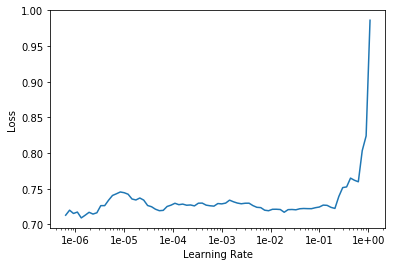

In [22]:
learn_classification.lr_find()
learn_classification.recorder.plot()

In [23]:
learn_classification.fit_one_cycle(5, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
1,0.688084,0.696794,0.540376,00:19
2,0.687625,0.688492,0.557136,00:19
3,0.685817,0.677034,0.592687,00:19
4,0.669029,0.722842,0.583037,00:19
5,0.677394,0.734541,0.593195,00:19


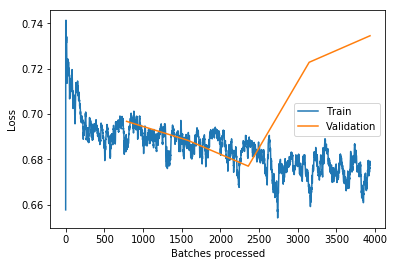

In [24]:
learn_classification.save("amit_clas_1")
learn_classification.recorder.plot_losses()

In [25]:
# learn.load("amit_clas_0")
learn_classification.freeze_to(-2)
learn_classification.fit_one_cycle(5, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
1,0.670595,0.669386,0.586084,00:21
2,0.676531,0.656815,0.607923,00:21
3,0.652161,0.645929,0.640934,00:21
4,0.644894,0.655021,0.623667,00:21
5,0.651269,0.649758,0.638903,00:21


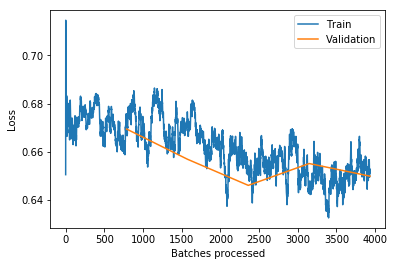

In [26]:
learn_classification.save("amit_clas_2")
learn_classification.recorder.plot_losses()

In [27]:
learn_classification.freeze_to(-3)
learn_classification.fit_one_cycle(5, slice(5e-4,1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
1,0.654308,0.642903,0.654647,00:31
2,0.639776,0.644838,0.632809,00:31
3,0.644721,0.631255,0.648553,00:31
4,0.610918,0.604106,0.682072,00:31
5,0.604548,0.608617,0.680041,00:31


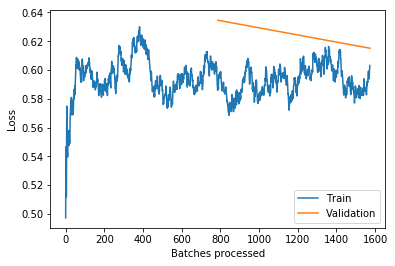

In [37]:
learn_classification.save("amit_clas_3")
learn_classification.recorder.plot_losses()

## export model

In [34]:
learn_classification.export("classification_amit.pkl")